## End to end Deep Learning Project Using Simple RNN

In [43]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense,GlobalAveragePooling1D

In [2]:
## Load the imdb dataset

max_features=10000 ##vocabulary size
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_features)

# Print the shape of the data
print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Testing data shape: {X_train.shape}, Testing labels shape: {y_test.shape}')

Training data shape: (25000,), Training labels shape: (25000,)
Testing data shape: (25000,), Testing labels shape: (25000,)


In [3]:
len(X_train)

25000

In [4]:
len(X_test)

25000

In [5]:
max_length = max([len(seq) for seq in X_train])
print("Max review length:", max_length)

Max review length: 2494


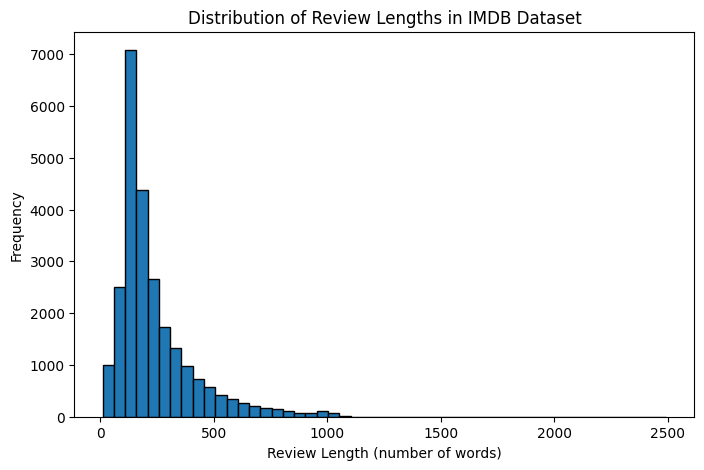

In [6]:
import matplotlib.pyplot as plt
# Get lengths of all sequences
seq_lengths = [len(seq) for seq in X_train]

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(seq_lengths, bins=50, edgecolor='black')
plt.title("Distribution of Review Lengths in IMDB Dataset")
plt.xlabel("Review Length (number of words)")
plt.ylabel("Frequency")
plt.show()

In [7]:
X_train[0],y_train[0]

([1,
  14,
  22,
  16,
  43,
  530,
  973,
  1622,
  1385,
  65,
  458,
  4468,
  66,
  3941,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  4536,
  1111,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2025,
  19,
  14,
  22,
  4,
  1920,
  4613,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  1247,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2223,
  5244,
  16,
  480,
  66,
  3785,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  1415,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  5952,
  15,
  256,
  4,
  2,
  7,
  3766,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  46,
  7,
  4,
  2,
  1029,
  

In [8]:
## Inspect a sample review and its label
sample_review=X_train[0]
sample_label=y_train[0]

print(f"Sample review (as integers):{sample_review}")
print(f'Sample label: {sample_label}')


Sample review (as integers):[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Sample label: 1


In [9]:
### MApping of words index bacl to words(for understanding)
word_index=imdb.get_word_index()
#word_index
reverse_word_index = {value: key for key, value in word_index.items()}
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

 Keras reserves the first few integers for special tokens:
-	0 = PAD
-	1 = START
-	2 = UNK (unknown)
-	3 = UNUSED

So the actual words start from index 4.

imdb.get_word_index() dont have above maping so we have to adjust that


In [10]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sample_review])
decoded_review
#.get(key, default) is a safe dictionary lookup:
#If key exists → return its value.
#If not → return '?'.

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [11]:
from tensorflow.keras.preprocessing import sequence

max_len=500 #as we can see from graph we cover majority of them

X_train=sequence.pad_sequences(X_train,maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)
X_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [12]:
len(X_train[0])

500

# Simple ANN

In [13]:
## Train Simple RNN
model=Sequential()
model.add(Embedding(max_features,128,input_length=max_len)) ## Embedding Layers
model.add(SimpleRNN(128,activation='relu'))
model.add(Dense(1,activation="sigmoid"))

/opt/anaconda3/envs/mlops/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
## Create an instance of EarlyStoppping Callback
from tensorflow.keras.callbacks import EarlyStopping
earlystopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
earlystopping

In [17]:
## Train the model with early sstopping
history=model.fit(
    X_train,y_train,epochs=10,batch_size=32,
    validation_split=0.2,
    callbacks=[earlystopping]
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - accuracy: 0.5510 - loss: 29953.4551 - val_accuracy: 0.5576 - val_loss: 0.7426
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.6120 - loss: 0.6596 - val_accuracy: 0.6526 - val_loss: 0.6140
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.7257 - loss: 0.5594 - val_accuracy: 0.6708 - val_loss: 0.5915
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 111ms/step - accuracy: 0.7413 - loss: 3148.0435 - val_accuracy: 0.6856 - val_loss: 0.5777
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 138ms/step - accuracy: 0.8034 - loss: 0.4350 - val_accuracy: 0.7486 - val_loss: 0.5057
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 114ms/step - accuracy: 0.8473 - loss: 0.3668 - val_accuracy: 0.7902 - val_loss: 0.5482
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 127ms/step - accuracy: 0.9032 - loss: 0.2606 - val_accuracy: 0.7896 - val_loss: 0.4990
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.9292 - los

- Your training accuracy is much higher than validation → model is overfitting.
- The instability in loss spikes (Epoch 1 & 4) is because SimpleRNN suffers from exploding gradients on longer sequences.
- That’s why in practice, people use LSTM or GRU, which handle long-term dependencies much better.

In [18]:
## Save model file
model.save('simple_rnn_imdb.h5')

In [19]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7764 - loss: 0.5243
Test Accuracy: 0.7756


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()
# Classification report
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step
              precision    recall  f1-score   support

    Negative       0.77      0.78      0.78     12500
    Positive       0.78      0.77      0.78     12500

    accuracy                           0.78     25000
   macro avg       0.78      0.78      0.78     25000
weighted avg       0.78      0.78      0.78     25000



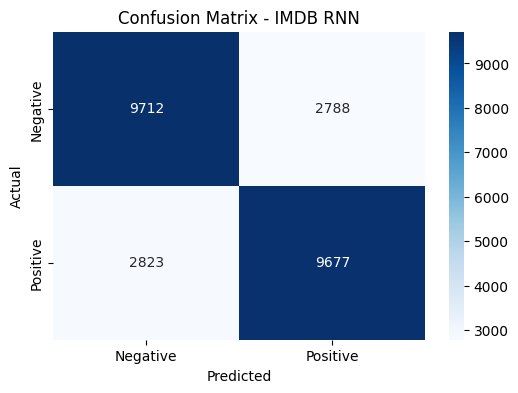

In [26]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - IMDB RNN")
plt.show()

# Simple ANN with dropouts

In [ ]:
# lets try sacked
## Train Simple RNN
model = Sequential([
    Embedding(max_features, 128, input_length=max_len), #input length is not always required
    #SimpleRNN(64, return_sequences=True),  # first RNN returns full sequence
    SimpleRNN(32, dropout=0.3, recurrent_dropout=0.3),                         # second RNN processes it
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
## Train the model with early sstopping
history=model.fit(
    X_train,y_train,epochs=30,batch_size=32,
    validation_split=0.2,
    callbacks=[earlystopping]
)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.5051 - loss: 0.7234 - val_accuracy: 0.5232 - val_loss: 0.6877
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.5265 - loss: 0.6940 - val_accuracy: 0.5576 - val_loss: 0.6831
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.5463 - loss: 0.6845 - val_accuracy: 0.5590 - val_loss: 0.6790
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5589 - loss: 0.6794 - val_accuracy: 0.5546 - val_loss: 0.6762
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.5724 - loss: 0.6747 - val_accuracy: 0.5578 - val_loss: 0.6735
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.5809 - loss: 0.6695 - val_accuracy: 0.5686 - val_loss: 0.6702
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.5797 - loss: 0.6670 - val_accuracy: 0.5608 - val_loss: 0.6696
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.5835 - loss: 0.6632 - 

In [38]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6000 - loss: 0.6549
Test Accuracy: 0.6021


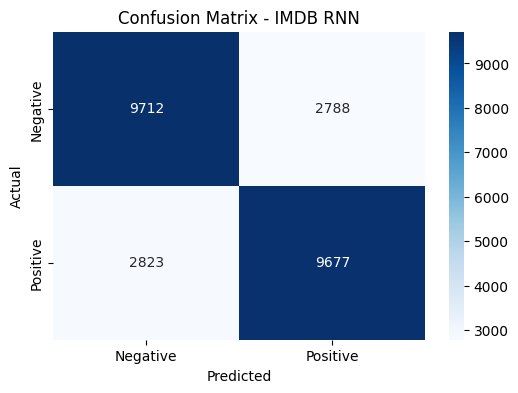

In [31]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - IMDB RNN")
plt.show()

As we can see that dropout didnt helped much, maybe its because of exploding gradient  

# Simple ANN

In [46]:

# Build ANN model
model = Sequential([
    Embedding(input_dim=max_features, output_dim=64, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")   # binary classification
])

# Compile
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

early_stop_validation = EarlyStopping(
    monitor="val_accuracy",   # monitor validation accuracy
    patience=2,               # stop if no improvement for 2 epochs
    mode="max",               # we want to maximize accuracy
    restore_best_weights=True # go back to best epoch
)

# Train
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2, callbacks=[early_stop_validation],
    verbose=1
)

Epoch 1/10


/opt/anaconda3/envs/mlops/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5201 - loss: 0.6922 - val_accuracy: 0.6230 - val_loss: 0.6850
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5898 - loss: 0.6759 - val_accuracy: 0.6446 - val_loss: 0.6391
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6736 - loss: 0.6239 - val_accuracy: 0.6712 - val_loss: 0.5832
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7080 - loss: 0.5616 - val_accuracy: 0.8078 - val_loss: 0.4924
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8115 - loss: 0.4743 - val_accuracy: 0.6942 - val_loss: 0.5331
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8215 - loss: 0.4233 - val_accuracy: 0.8244 - val_loss: 0.4037
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8580 - loss: 0.3654 - val_accuracy: 0.8644 - val_loss: 0.3601
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8490 - loss: 0.3548 - val_accuracy: 0.8050 - val_loss: 0.

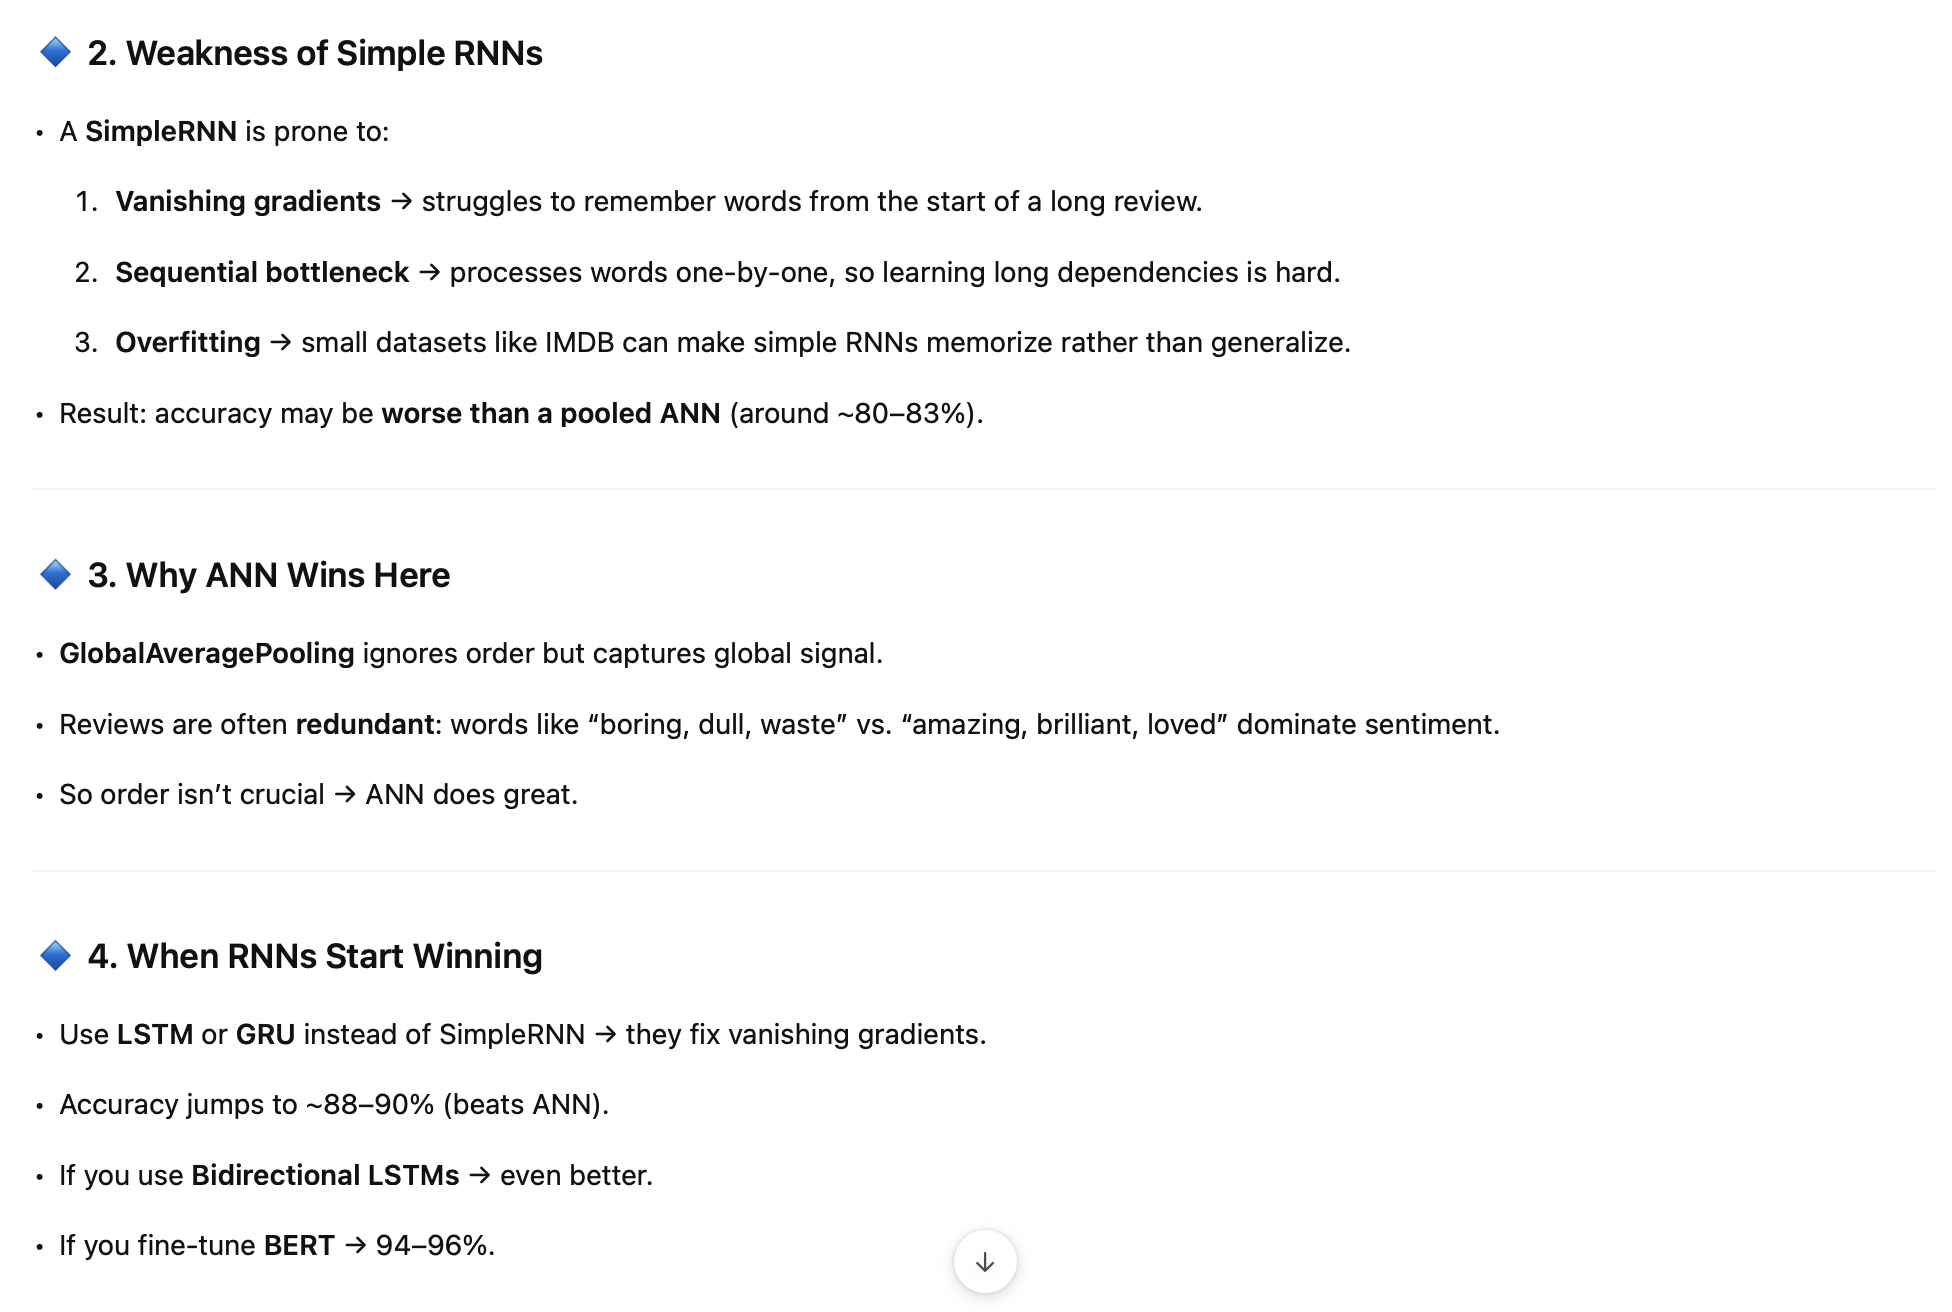